<img src="https://www.uc3m.es/ss/Satellite?blobcol=urldata&blobkey=id&blobtable=MungoBlobs&blobwhere=1371573952659">

---

# WEB ANALYTICS COURSE 4 - SEMESTER 2
# BACHELOR IN DATA SCIENCE AND ENGINEERING

# LAB DATA VISUALIZATION IN THE WEB

---


In this block we will use data from the *Instituto Nacional de Estadística* [INE](https://www.ine.es/index.htm). We will be focus on the Tourism Sector.

We are going to analyze the tourism from two points of view. On the one hand, we are going to use the data that give us information on the history of travel in Spain. On the other hand, we will analyze employment in the tourism sector. You can visit the INE website for more information about the datasets. But in this [folder](https://drive.google.com/file/d/13Jhw6LWyja1z1be3bFKAWOh5KeM3XuqZ/view?usp=sharing) you can find the files that we will use in the labs.

# Lab1: Data Processing and Visualization in Python

## 0. Lab Preparation

1.  Study and have clear the concepts explained in the theoretical class and the introductory lab.

2.   Gain experience with the use of the [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/) and/or [Seaborn](https://seaborn.pydata.org/) and [Folium](https://python-visualization.github.io/folium/). The exercises of this lab will be mainly based on the utilization of functions offered by these libraries for data cleaning and data processing.

3. It is assumed students have experience in using Python notebooks. Either a local installation (e.g., local python installation + Jupyter) or a cloud-based solution (e.g., Google Colab). *We recommend the second option*.

## 1. Lab Introduction

* In this lab, we will prepare our dataset for later analysis and visualization using [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/) and/or [Seaborn](https://seaborn.pydata.org/) and [Folium](https://python-visualization.github.io/folium/).

* The lab will be done in groups of 2 people.

* The lab defines a set of milestones the students must complete. Upon completing every milestone, students should call the professor, who will check the correctness of the solution (*If the professor is busy, do not wait for them, move to the next milestone*).

* **The final mark will be computed as a function of the number of milestones successfully completed.**

* **Each group should also share their lab notebook with the professor upon the finalization of the lab.**

- It is recommended to use [Google Colab](https://colab.research.google.com/) to produce the Python notebook with the solution of the lab. Of course, if any student prefers using its local programming environment (e.g., jupyter) and python installation, they are welcome to do so.

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
%cd /content/drive/MyDrive/WEB_ANALYTICS/Lab4_DataVisualization/Data

/content/drive/MyDrive/WEB_ANALYTICS/Lab4_DataVisualization/Data


# Milestone 1

1. Load the datasets about tourism ([INE_tourism](https://drive.google.com/file/d/13Jhw6LWyja1z1be3bFKAWOh5KeM3XuqZ/view?usp=sharing)) into dataframes
2. Prepare the data for later analysis, that is:
  * Split the column *Periodo* in *Year* and *Quarter* or *Month*.
  * Transform column numbers that are identified as Objects by Python to numbers. (Print *dtypes* of your dataframes to check it is done correctly).
  * Extract the Autonomous Community (CCAA) from the corresponding column.
  



In [84]:
%cd INE_tourism/

/content/drive/MyDrive/WEB_ANALYTICS/Lab4_DataVisualization/Data/INE_tourism


## **1.** LOAD THE DATASETS

In [85]:
import pandas as pd

# STEP 1

# Viajes, pernoctaciones, duración media y gasto por comunidad autónoma de residencia de los viajeros
viajes_por_com_auton = pd.read_csv("Viajes, pernoctaciones, duración media y gasto por comunidad autónoma de residencia de los viajeros.csv", sep='\t')
#viajes_por_com_auton.head(10)

# Viajes con destino principal interno, pernoctaciones, duración media y gasto por tipo de destino principal, según comunidad autónoma de residencia de los viajeros
viajes_internos = pd.read_csv("Viajes con destino principal interno, pernoctaciones, duración media y gasto por tipo de destino principal, según comunidad autónoma de residencia de los viajeros.csv", sep='\t')
#viajes_internos.head(10)

# Número de turistas según motivo principal del viaje.csv
num_turistas_segun_motivo = pd.read_csv("Número de turistas según motivo principal del viaje.csv", sep='\t')
#num_turistas_segun_motivo.head(10)

# Número de turistas según comunidad autónoma de destino principal.csv
num_turistas_segun_com_auton = pd.read_csv("Número de turistas según comunidad autónoma de destino principal.csv", sep='\t')
#num_turistas_segun_com_auton.head(10)

## **2.** PREPARE DATA FOR ANALYSIS

### **2.1** Split column Periodo in Year and Quarter or Month

#### **2.1.1** Dataframe 1 - viajes_por_com_auton

In [86]:
# DATAFRAME 1

# Split the 'Periodo' column into 'Year' and 'Quarter' using regex
viajes_por_com_auton[['Year', 'Quarter']] = viajes_por_com_auton['Periodo'].str.extract(r'(\d{4})(T\d)')
# Convert 'Year' to numeric if needed
viajes_por_com_auton['Year'] = pd.to_numeric(viajes_por_com_auton['Year'])

#viajes_por_com_auton.head(10)

#### **2.1.2** Dataframe 2 - viajes_internos

In [87]:
# DATAFRAME 2

# Split the 'Periodo' column into 'Year' and 'Quarter' using regex
viajes_internos[['Year', 'Quarter']] = viajes_internos['Periodo'].str.extract(r'(\d{4})T(\d)')
# Convert 'Year' to numeric if needed
viajes_internos['Year'] = pd.to_numeric(viajes_internos['Year'])

viajes_internos.head(10)

,Comunidad autónoma de residencia,Tipo de destino,Concepto turístico,Tipo de dato,Periodo,Total,Year,Quarter
0,Total,España,Viajes,Valor absoluto,2021T2,33.562.076,2021,2
1,Total,España,Viajes,Valor absoluto,2021T1,14.751.836,2021,1
2,Total,España,Viajes,Valor absoluto,2020T4,16.785.079,2020,4
3,Total,España,Viajes,Valor absoluto,2020T3,44.628.688,2020,3
4,Total,España,Viajes,Valor absoluto,2020T2,8.869.729,2020,2
5,Total,España,Viajes,Valor absoluto,2020T1,26.165.898,2020,1
6,Total,España,Viajes,Valor absoluto,2019T4,36.617.772,2019,4
7,Total,España,Viajes,Valor absoluto,2019T3,53.844.317,2019,3
8,Total,España,Viajes,Valor absoluto,2019T2,45.541.375,2019,2
9,Total,España,Viajes,Valor absoluto,2019T1,37.751.508,2019,1


#### **2.1.3** Dataframe 3 - num_turistas_segun_motivo

In [88]:
# DATAFRAME 3

# Split the 'Periodo' column into 'Year' and 'Month'
num_turistas_segun_motivo[['Year', 'Month']] = num_turistas_segun_motivo['Periodo'].str.extract(r'(\d{4})(M\d{2})')
# Convert 'Year' to numeric if needed
num_turistas_segun_motivo['Year'] = pd.to_numeric(num_turistas_segun_motivo['Year'])

#num_turistas_segun_motivo.head(10)

#### **2.1.4** Dataframe 4 - num_turistas_segun_com_auton

In [89]:
# DATAFRAME 4

# Split the 'Periodo' column into 'Year' and 'Month'
num_turistas_segun_com_auton[['Year', 'Month']] = num_turistas_segun_com_auton['Periodo'].str.extract(r'(\d{4})(M\d{2})')
# Convert 'Year' to numeric if needed
num_turistas_segun_com_auton['Year'] = pd.to_numeric(num_turistas_segun_com_auton['Year'])

#num_turistas_segun_com_auton.head(80)

### **2.2** Transform column numbers that are identified as Objects by Python to numbers.

#### **2.2.1** Dataframe 1 - viajes_por_com_auton

In [90]:
# DATAFRAME 1

# Check columns data types
viajes_por_com_auton.dtypes

,0
Comunidad autónoma de residencia,object
Concepto turístico,object
Tipo de dato,object
Periodo,object
Total,object
Year,int64
Quarter,object


In [91]:
# Transform column total to numeric
viajes_por_com_auton['Total'] = viajes_por_com_auton['Total'].str.replace('.', '', regex=False)  # Remove dots
viajes_por_com_auton['Total'] = pd.to_numeric(viajes_por_com_auton['Total'].str.replace(',', '.', regex=False))  # Remove dots

In [92]:
# Check again the columns data types
viajes_por_com_auton.dtypes

,0
Comunidad autónoma de residencia,object
Concepto turístico,object
Tipo de dato,object
Periodo,object
Total,float64
Year,int64
Quarter,object


#### **2.2.2** Dataframe 2 - viajes_internos

In [93]:
# DATAFRAME 2

# Check columns data types
viajes_internos.dtypes

,0
Comunidad autónoma de residencia,object
Tipo de destino,object
Concepto turístico,object
Tipo de dato,object
Periodo,object
Total,object
Year,int64
Quarter,object


In [94]:
# Transform column total to numeric
viajes_internos['Total'] = viajes_internos['Total'].str.replace('.', '', regex=False)  # Remove dots
viajes_internos['Total'] = pd.to_numeric(viajes_internos['Total'].str.replace(',', '.', regex=False))  # Remove dots

In [95]:
# Check again the columns data types
viajes_internos.dtypes

,0
Comunidad autónoma de residencia,object
Tipo de destino,object
Concepto turístico,object
Tipo de dato,object
Periodo,object
Total,float64
Year,int64
Quarter,object


#### **2.2.3** Dataframe 3 - num_turistas_segun_motivo

In [96]:
# DATAFRAME 3

# Check columns data types
num_turistas_segun_motivo.dtypes

,0
Motivo del viaje,object
Tipo de dato,object
Periodo,object
Total,object
Year,int64
Month,object


In [97]:
# Transform column total to numeric
num_turistas_segun_motivo['Total'] = num_turistas_segun_motivo['Total'].str.replace('.', '', regex=False)  # Remove dots
num_turistas_segun_motivo['Total'] = pd.to_numeric(num_turistas_segun_motivo['Total'].str.replace(',', '.', regex=False))  # Remove dots

In [98]:
# Check again the columns data types
num_turistas_segun_motivo.dtypes

,0
Motivo del viaje,object
Tipo de dato,object
Periodo,object
Total,float64
Year,int64
Month,object


#### **2.2.4** Dataframe 4 - num_turistas_segun_com_auton

In [99]:
# DATAFRAME 4

# Check columns data types
num_turistas_segun_com_auton.dtypes

,0
Comunidades autónomas,object
Tipo de dato,object
Periodo,object
Total,object
Year,int64
Month,object


In [100]:
# Transform column total to numeric
num_turistas_segun_com_auton['Total'] = num_turistas_segun_com_auton['Total'].str.replace('.', '', regex=False)  # Remove dots
num_turistas_segun_com_auton['Total'] = pd.to_numeric(num_turistas_segun_com_auton['Total'].str.replace(',', '.', regex=False))  # Remove dots

In [101]:
# Check again the columns data types
num_turistas_segun_com_auton.dtypes

,0
Comunidades autónomas,object
Tipo de dato,object
Periodo,object
Total,float64
Year,int64
Month,object


### **2.3** Extract the Autonomous Community (CCAA) from the corresponding column.

#### **2.3.1** Dataframe 1 - viajes_por_com_auton

In [102]:
# Regular expression substitues number and spaces by empty string to just retrieve the text
viajes_por_com_auton['CCAA'] = viajes_por_com_auton['Comunidad autónoma de residencia'].str.replace(r'^\d+\s*', '', regex=True)

viajes_por_com_auton_list = viajes_por_com_auton['CCAA'].unique().tolist()
print(viajes_por_com_auton_list)

viajes_por_com_auton.head(7300)

['Total', 'Andalucía', 'Aragón', 'Asturias, Principado de', 'Balears, Illes', 'Canarias', 'Cantabria', 'Castilla y León', 'Castilla - La Mancha', 'Cataluña', 'Comunitat Valenciana', 'Extremadura', 'Galicia', 'Madrid, Comunidad de', 'Murcia, Región de', 'Navarra, Comunidad Foral de', 'País Vasco', 'Rioja, La', 'Ceuta', 'Melilla']


,Comunidad autónoma de residencia,Concepto turístico,Tipo de dato,Periodo,Total,Year,Quarter,CCAA
0,Total,Viajes,Valor absoluto,2021T2,34293875.00,2021,T2,Total
1,Total,Viajes,Valor absoluto,2021T1,15220538.00,2021,T1,Total
2,Total,Viajes,Valor absoluto,2020T4,17188061.00,2020,T4,Total
3,Total,Viajes,Valor absoluto,2020T3,46136493.00,2020,T3,Total
4,Total,Viajes,Valor absoluto,2020T2,9027260.00,2020,T2,Total
...,...,...,...,...,...,...,...,...
7295,07 Castilla y León,Gasto medio por persona,Variación anual,2017T3,14.56,2017,T3,Castilla y León
7296,07 Castilla y León,Gasto medio por persona,Variación anual,2017T2,12.73,2017,T2,Castilla y León
7297,07 Castilla y León,Gasto medio por persona,Variación anual,2017T1,-2.23,2017,T1,Castilla y León
7298,07 Castilla y León,Gasto medio por persona,Variación anual,2016T4,12.99,2016,T4,Castilla y León


#### **2.3.2** Dataframe 2 - viajes_internos

In [103]:
# Regular expression substitues number and spaces by empty string to just retrieve the text
viajes_internos['CCAA'] = viajes_internos['Comunidad autónoma de residencia'].str.replace(r'^\d+\s*', '', regex=True)

viajes_internos_list = viajes_internos['CCAA'].unique().tolist()
print(viajes_internos_list)

viajes_internos.head(7300)

['Total', 'Andalucía', 'Aragón', 'Asturias, Principado de', 'Balears, Illes', 'Canarias', 'Cantabria', 'Castilla y León', 'Castilla - La Mancha', 'Cataluña', 'Comunitat Valenciana', 'Extremadura', 'Galicia', 'Madrid, Comunidad de', 'Murcia, Región de', 'Navarra, Comunidad Foral de', 'País Vasco', 'Rioja, La', 'Ceuta', 'Melilla']


,Comunidad autónoma de residencia,Tipo de destino,Concepto turístico,Tipo de dato,Periodo,Total,Year,Quarter,CCAA
0,Total,España,Viajes,Valor absoluto,2021T2,33562076.00,2021,2,Total
1,Total,España,Viajes,Valor absoluto,2021T1,14751836.00,2021,1,Total
2,Total,España,Viajes,Valor absoluto,2020T4,16785079.00,2020,4,Total
3,Total,España,Viajes,Valor absoluto,2020T3,44628688.00,2020,3,Total
4,Total,España,Viajes,Valor absoluto,2020T2,8869729.00,2020,2,Total
...,...,...,...,...,...,...,...,...,...
7295,02 Aragón,Dentro de la Comunidad Autónoma,Gasto medio por persona,Variación anual,2017T3,-1.91,2017,3,Aragón
7296,02 Aragón,Dentro de la Comunidad Autónoma,Gasto medio por persona,Variación anual,2017T2,-9.86,2017,2,Aragón
7297,02 Aragón,Dentro de la Comunidad Autónoma,Gasto medio por persona,Variación anual,2017T1,-9.66,2017,1,Aragón
7298,02 Aragón,Dentro de la Comunidad Autónoma,Gasto medio por persona,Variación anual,2016T4,-2.24,2016,4,Aragón


#### **2.3.3** Dataframe 3 - num_turistas_segun_motivo

In [104]:
# DOES NOT HAVE CCAA

#### **2.3.4** Dataframe 4 - num_turistas_segun_com_auton

In [105]:
# Regular expression substitues number and spaces by empty string to just retrieve the text
num_turistas_segun_com_auton['CCAA'] = num_turistas_segun_com_auton['Comunidades autónomas'].str.replace(r'^\d+\s*', '', regex=True)

num_turistas_segun_com_auton_list = num_turistas_segun_com_auton['CCAA'].unique().tolist()
print(num_turistas_segun_com_auton_list)

num_turistas_segun_com_auton.head(900)

['Total', 'Andalucía', 'Balears, Illes', 'Canarias', 'Cataluña', 'Comunitat Valenciana', 'Madrid, Comunidad de', 'Otras Comunidades Autónomas']


,Comunidades autónomas,Tipo de dato,Periodo,Total,Year,Month,CCAA
0,Total,Dato base,2021M09,4691486.0,2021,M09,Total
1,Total,Dato base,2021M08,5194212.0,2021,M08,Total
2,Total,Dato base,2021M07,4395384.0,2021,M07,Total
3,Total,Dato base,2021M06,2215710.0,2021,M06,Total
4,Total,Dato base,2021M05,1363624.0,2021,M05,Total
...,...,...,...,...,...,...,...
895,05 Canarias,Dato base,2019M02,1179673.0,2019,M02,Canarias
896,05 Canarias,Dato base,2019M01,1158782.0,2019,M01,Canarias
897,05 Canarias,Dato base,2018M12,1256190.0,2018,M12,Canarias
898,05 Canarias,Dato base,2018M11,1184564.0,2018,M11,Canarias


# Milestone 2

1. Load the datasets about employment ([INE_employment](https://drive.google.com/file/d/13Jhw6LWyja1z1be3bFKAWOh5KeM3XuqZ/view?usp=sharing)) into dataframes
2. Prepare the data for later analysis, that is:
  * Split the column *Periodo* in *Year* and *Quarter* or *Month*.
  * Transform column numbers that are identified as Objects by Python to numbers. (Print *dtypes* of your dataframes to check it is done correctly).
  * Extract the Autonomous Community (CCAA) from the corresponding column.
  * From the "Ocupados por sexo y rama de actividad. Valores absolutos y porcentajes respecto del total de cada sexo" file:
    * Extract CNAE Code from column *Rama de actividad CNAE 2009* (you must regular expressions).
    * Filter the dataframe to obtain the rows with CNAE Codes: 49, 50, 51, 52, 55, 56, 77, 79, 90, 91, 93.
  * From the "Ocupados por rama de actividad, sexo y comunidad autónoma" file:
    * Filter the dataframe to obtain only the rows with the following activities (*Rama de actividad CNAE 2009*):
      * G + H + I
      * M + N
      * R + S + T + U



In [106]:
%cd /content/drive/MyDrive/WEB_ANALYTICS/Lab4_DataVisualization/Data/INE_employment/

/content/drive/MyDrive/WEB_ANALYTICS/Lab4_DataVisualization/Data/INE_employment


## **1.** LOAD THE DATASETS

In [107]:
import pandas as pd

# STEP 1

# Ocupados por rama de actividad, sexo y comunidad autónoma
ocupados = pd.read_csv("Ocupados por rama de actividad, sexo y comunidad autónoma.csv", sep="\t")
ocupados.head(10)

,Sexo,Comunidades y Ciudades Autónomas,Rama de actividad CNAE 2009,Periodo,Total
0,Ambos sexos,Total Nacional,Total,2021T3,20.031
1,Ambos sexos,Total Nacional,Total,2021T2,"19.671,7"
2,Ambos sexos,Total Nacional,Total,2021T1,"19.206,8"
3,Ambos sexos,Total Nacional,Total,2020T4,"19.344,3"
4,Ambos sexos,Total Nacional,Total,2020T3,"19.176,9"
5,Ambos sexos,Total Nacional,Total,2020T2,"18.607,2"
6,Ambos sexos,Total Nacional,Total,2020T1,"19.681,3"
7,Ambos sexos,Total Nacional,Total,2019T4,"19.966,9"
8,Ambos sexos,Total Nacional,Total,2019T3,"19.874,3"
9,Ambos sexos,Total Nacional,Total,2019T2,"19.804,9"


In [108]:
# Ocupados por sexo y rama de actividad. Valores absolutos y porcentajes respecto del total de cada sexo
ocupados_porcentajes_valabs = pd.read_csv("Ocupados por sexo y rama de actividad. Valores absolutos y porcentajes respecto del total de cada sexo.csv", sep='\t')
ocupados_porcentajes_valabs.head(10)

,Rama de actividad CNAE 2009,Sexo,Unidad,Periodo,Total
0,Total,Ambos sexos,Valor absoluto,2021T3,20.031
1,Total,Ambos sexos,Valor absoluto,2021T2,"19.671,7"
2,Total,Ambos sexos,Valor absoluto,2021T1,"19.206,8"
3,Total,Ambos sexos,Valor absoluto,2020T4,"19.344,3"
4,Total,Ambos sexos,Valor absoluto,2020T3,"19.176,9"
5,Total,Ambos sexos,Valor absoluto,2020T2,"18.607,2"
6,Total,Ambos sexos,Valor absoluto,2020T1,"19.681,3"
7,Total,Ambos sexos,Valor absoluto,2019T4,"19.966,9"
8,Total,Ambos sexos,Valor absoluto,2019T3,"19.874,3"
9,Total,Ambos sexos,Valor absoluto,2019T2,"19.804,9"


## **2.** PREPARE DATA FOR ANALYSIS

### **2.1** Split column Periodo in Year and Quarter or Month

#### **2.1.1** Dataframe 1 - ocupados

In [109]:
# DATAFRAME 1

# Split the 'Periodo' column into 'Year' and 'Quarter' using regex
ocupados[['Year', 'Quarter']] = ocupados['Periodo'].str.extract(r'(\d{4})(T\d)')
# Convert 'Year' to numeric if needed
ocupados['Year'] = pd.to_numeric(ocupados['Year'])

ocupados.head(10)

,Sexo,Comunidades y Ciudades Autónomas,Rama de actividad CNAE 2009,Periodo,Total,Year,Quarter
0,Ambos sexos,Total Nacional,Total,2021T3,20.031,2021,T3
1,Ambos sexos,Total Nacional,Total,2021T2,"19.671,7",2021,T2
2,Ambos sexos,Total Nacional,Total,2021T1,"19.206,8",2021,T1
3,Ambos sexos,Total Nacional,Total,2020T4,"19.344,3",2020,T4
4,Ambos sexos,Total Nacional,Total,2020T3,"19.176,9",2020,T3
5,Ambos sexos,Total Nacional,Total,2020T2,"18.607,2",2020,T2
6,Ambos sexos,Total Nacional,Total,2020T1,"19.681,3",2020,T1
7,Ambos sexos,Total Nacional,Total,2019T4,"19.966,9",2019,T4
8,Ambos sexos,Total Nacional,Total,2019T3,"19.874,3",2019,T3
9,Ambos sexos,Total Nacional,Total,2019T2,"19.804,9",2019,T2


#### **2.1.2** Dataframe 2 - ocupados_porcentajes_valabs

In [110]:
# DATAFRAME 2

# Split the 'Periodo' column into 'Year' and 'Quarter' using regex
ocupados_porcentajes_valabs[['Year', 'Quarter']] = ocupados_porcentajes_valabs['Periodo'].str.extract(r'(\d{4})(T\d)')
# Convert 'Year' to numeric if needed
ocupados_porcentajes_valabs['Year'] = pd.to_numeric(ocupados_porcentajes_valabs['Year'])

ocupados.head(10)

,Sexo,Comunidades y Ciudades Autónomas,Rama de actividad CNAE 2009,Periodo,Total,Year,Quarter
0,Ambos sexos,Total Nacional,Total,2021T3,20.031,2021,T3
1,Ambos sexos,Total Nacional,Total,2021T2,"19.671,7",2021,T2
2,Ambos sexos,Total Nacional,Total,2021T1,"19.206,8",2021,T1
3,Ambos sexos,Total Nacional,Total,2020T4,"19.344,3",2020,T4
4,Ambos sexos,Total Nacional,Total,2020T3,"19.176,9",2020,T3
5,Ambos sexos,Total Nacional,Total,2020T2,"18.607,2",2020,T2
6,Ambos sexos,Total Nacional,Total,2020T1,"19.681,3",2020,T1
7,Ambos sexos,Total Nacional,Total,2019T4,"19.966,9",2019,T4
8,Ambos sexos,Total Nacional,Total,2019T3,"19.874,3",2019,T3
9,Ambos sexos,Total Nacional,Total,2019T2,"19.804,9",2019,T2


### **2.2** Transform column numbers that are identified as Objects by Python to numbers.

#### **2.2.1** Dataframe 1 - ocupados

In [111]:
# DATAFRAME 1

# Check columns data types
ocupados.dtypes

,0
Sexo,object
Comunidades y Ciudades Autónomas,object
Rama de actividad CNAE 2009,object
Periodo,object
Total,object
Year,int64
Quarter,object


In [112]:
# Transform column total to numeric
ocupados['Total'] = ocupados['Total'].str.replace('.', '', regex=False)  # Remove dots
ocupados['Total'] = pd.to_numeric(ocupados['Total'].str.replace(',', '.', regex=False))  # Remove dots

In [113]:
# Check again the columns data types
ocupados.dtypes

,0
Sexo,object
Comunidades y Ciudades Autónomas,object
Rama de actividad CNAE 2009,object
Periodo,object
Total,float64
Year,int64
Quarter,object


#### **2.2.2** Dataframe 2 - ocupados_porcentajes_valabs

In [114]:
# DATAFRAME 2

# Check columns data types
ocupados_porcentajes_valabs.dtypes

,0
Rama de actividad CNAE 2009,object
Sexo,object
Unidad,object
Periodo,object
Total,object
Year,int64
Quarter,object


In [115]:
# Transform column total to numeric
ocupados_porcentajes_valabs['Total'] = ocupados_porcentajes_valabs['Total'].str.replace('.', '', regex=False)  # Remove dots
ocupados_porcentajes_valabs['Total'] = pd.to_numeric(ocupados_porcentajes_valabs['Total'].str.replace(',', '.', regex=False))  # Remove dots

In [116]:
# Check again the columns data types
ocupados_porcentajes_valabs.dtypes

,0
Rama de actividad CNAE 2009,object
Sexo,object
Unidad,object
Periodo,object
Total,float64
Year,int64
Quarter,object


### **2.3** Extract the Autonomous Community (CCAA) from the corresponding column.

#### **2.3.1** Dataframe 1 - ocupados

In [117]:
# Regular expression substitues number and spaces by empty string to just retrieve the text
ocupados['CCAA'] = ocupados['Comunidades y Ciudades Autónomas'].str.replace(r'^\d+\s*', '', regex=True)

ocupados_list = ocupados['CCAA'].unique().tolist()
print(ocupados_list)

ocupados.head(900)

['Total Nacional', 'Andalucía', 'Aragón', 'Asturias, Principado de', 'Balears, Illes', 'Canarias', 'Cantabria', 'Castilla y León', 'Castilla - La Mancha', 'Cataluña', 'Comunitat Valenciana', 'Extremadura', 'Galicia', 'Madrid, Comunidad de', 'Murcia, Región de', 'Navarra, Comunidad Foral de', 'País Vasco', 'Rioja, La', 'Ceuta', 'Melilla']


,Sexo,Comunidades y Ciudades Autónomas,Rama de actividad CNAE 2009,Periodo,Total,Year,Quarter,CCAA
0,Ambos sexos,Total Nacional,Total,2021T3,20031.0,2021,T3,Total Nacional
1,Ambos sexos,Total Nacional,Total,2021T2,19671.7,2021,T2,Total Nacional
2,Ambos sexos,Total Nacional,Total,2021T1,19206.8,2021,T1,Total Nacional
3,Ambos sexos,Total Nacional,Total,2020T4,19344.3,2020,T4,Total Nacional
4,Ambos sexos,Total Nacional,Total,2020T3,19176.9,2020,T3,Total Nacional
...,...,...,...,...,...,...,...,...
895,Ambos sexos,01 Andalucía,B_E Industrias extractivas; suministro de ener...,2017T4,35.0,2017,T4,Andalucía
896,Ambos sexos,01 Andalucía,B_E Industrias extractivas; suministro de ener...,2017T3,33.7,2017,T3,Andalucía
897,Ambos sexos,01 Andalucía,B_E Industrias extractivas; suministro de ener...,2017T2,42.3,2017,T2,Andalucía
898,Ambos sexos,01 Andalucía,B_E Industrias extractivas; suministro de ener...,2017T1,43.7,2017,T1,Andalucía


#### **2.3.2** Dataframe 2 - ocupados_porcentajes_valabs

In [118]:
# DOES NOT HAVE CCAA

### **2.4** From the "Ocupados por sexo y rama de actividad. Valores absolutos y porcentajes respecto del total de cada sexo" file:

#### **2.4.1** Extract CNAE Code from column Rama de actividad CNAE 2009 (you must regular expressions).

In [119]:
# Captures a sequence of one or more alphanumeric characters (A-Z, a-z, 0-9).
# +: captures one or more repetitions of the specified characters
ocupados_porcentajes_valabs['CNAE_Code'] = ocupados_porcentajes_valabs['Rama de actividad CNAE 2009'].str.extract(r'^([A-Za-z0-9]+)')

CNAE_codes = ocupados_porcentajes_valabs['CNAE_Code'].unique().tolist()
print(CNAE_codes)

ocupados_porcentajes_valabs.head(800)

['Total', 'A', '01', '02', '03', 'B', '05', '06', '07', '08', '09', 'C', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', 'D', '35', 'E', '36', '37', '38', '39', 'F', '41', '42', '43', 'G', '45', '46', '47', 'H', '49', '50', '51', '52', '53', 'I', '55', '56', 'J', '58', '59', '60', '61', '62', '63', 'K', '64', '65', '66', 'L', '68', 'M', '69', '70', '71', '72', '73', '74', '75', 'N', '77', '78', '79', '80', '81', '82', 'O', '84', 'P', '85', 'Q', '86', '87', '88', 'R', '90', '91', '92', '93', 'S', '94', '95', '96', 'T', '97', '98', 'U', '99']


,Rama de actividad CNAE 2009,Sexo,Unidad,Periodo,Total,Year,Quarter,CNAE_Code
0,Total,Ambos sexos,Valor absoluto,2021T3,20031.0,2021,T3,Total
1,Total,Ambos sexos,Valor absoluto,2021T2,19671.7,2021,T2,Total
2,Total,Ambos sexos,Valor absoluto,2021T1,19206.8,2021,T1,Total
3,Total,Ambos sexos,Valor absoluto,2020T4,19344.3,2020,T4,Total
4,Total,Ambos sexos,Valor absoluto,2020T3,19176.9,2020,T3,Total
...,...,...,...,...,...,...,...,...
795,"01 Agricultura, ganadería, caza y servicios re...",Hombres,Valor absoluto,2015T2,507.7,2015,T2,01
796,"01 Agricultura, ganadería, caza y servicios re...",Hombres,Valor absoluto,2015T1,505.3,2015,T1,01
797,"01 Agricultura, ganadería, caza y servicios re...",Hombres,Valor absoluto,2014T4,506.6,2014,T4,01
798,"01 Agricultura, ganadería, caza y servicios re...",Hombres,Valor absoluto,2014T3,460.2,2014,T3,01


#### **2.4.2** Filter the dataframe to obtain the rows with CNAE Codes: 49, 50, 51, 52, 55, 56, 77, 79, 90, 91, 93.

In [120]:
# Define the list of CNAE codes to filter
cnae_codes_to_filter = ['49', '50', '51', '52', '55', '56', '77', '79', '90', '91', '93']

# Filter the DataFrame
filtered_ocupados_porc_abs = ocupados_porcentajes_valabs[ocupados_porcentajes_valabs['CNAE_Code'].isin(cnae_codes_to_filter)]

# Display the filtered DataFrame
filtered_ocupados_porc_abs.head(8000)

,Rama de actividad CNAE 2009,Sexo,Unidad,Periodo,Total,Year,Quarter,CNAE_Code
17160,49 Transporte terrestre y por tubería,Ambos sexos,Valor absoluto,2021T3,544.2,2021,T3,49
17161,49 Transporte terrestre y por tubería,Ambos sexos,Valor absoluto,2021T2,557.0,2021,T2,49
17162,49 Transporte terrestre y por tubería,Ambos sexos,Valor absoluto,2021T1,582.6,2021,T1,49
17163,49 Transporte terrestre y por tubería,Ambos sexos,Valor absoluto,2020T4,575.4,2020,T4,49
17164,49 Transporte terrestre y por tubería,Ambos sexos,Valor absoluto,2020T3,546.9,2020,T3,49
...,...,...,...,...,...,...,...,...
33325,"93 Actividades deportivas, recreativas y de en...",Mujeres,Porcentaje,2009T1,0.7,2009,T1,93
33326,"93 Actividades deportivas, recreativas y de en...",Mujeres,Porcentaje,2008T4,0.9,2008,T4,93
33327,"93 Actividades deportivas, recreativas y de en...",Mujeres,Porcentaje,2008T3,0.9,2008,T3,93
33328,"93 Actividades deportivas, recreativas y de en...",Mujeres,Porcentaje,2008T2,0.7,2008,T2,93


### **2.5** From the "Ocupados por rama de actividad, sexo y comunidad autónoma" file:

#### **2.5.1** Filter the dataframe to obtain only the rows with the following activities (Rama de actividad CNAE 2009):

    G + H + I
    M + N
    R + S + T + U


In [1]:
# Filter of activities
activities = ['G \+ H \+ I ', ' M \+ N ', ' R \+ S \+ T \+ U ']

filtered_GHI = ocupados[ocupados['Rama de actividad CNAE 2009'].str.contains(activities[0], regex=True)]
filtered_MN = ocupados[ocupados['Rama de actividad CNAE 2009'].str.contains(activities[1], regex=True)]
filtered_RSTU = ocupados[ocupados['Rama de actividad CNAE 2009'].str.contains(activities[2], regex=True)]

filtered_ocupados = pd.concat([filtered_GHI, filtered_MN, filtered_RSTU])
filtered_ocupados

NameError: name 'ocupados' is not defined

# Milestone 3

Now, we will visualize our pre-processed datasets using [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). You can choose one or both libraries for this milestones.  

*Note that you may need to modify/reshape the dataframe to accommodate the data for the visualization part*.

1. Plot a bar graph of employed people in the toursim sector by activity (CNAE codes selected above) for both sexs, in absolute values and splitted by years.
2. Plot a bar graph of employed people in the toursim sector by year, sex and CCAA.
3. Plot a boxplot graph containing the distribution of the number of tourists by year per CCAA.
  

## **1.** Plot a bar graph of employed people in the toursim sector by activity (CNAE codes selected above) for both sexes, in absolute values and splitted by years.

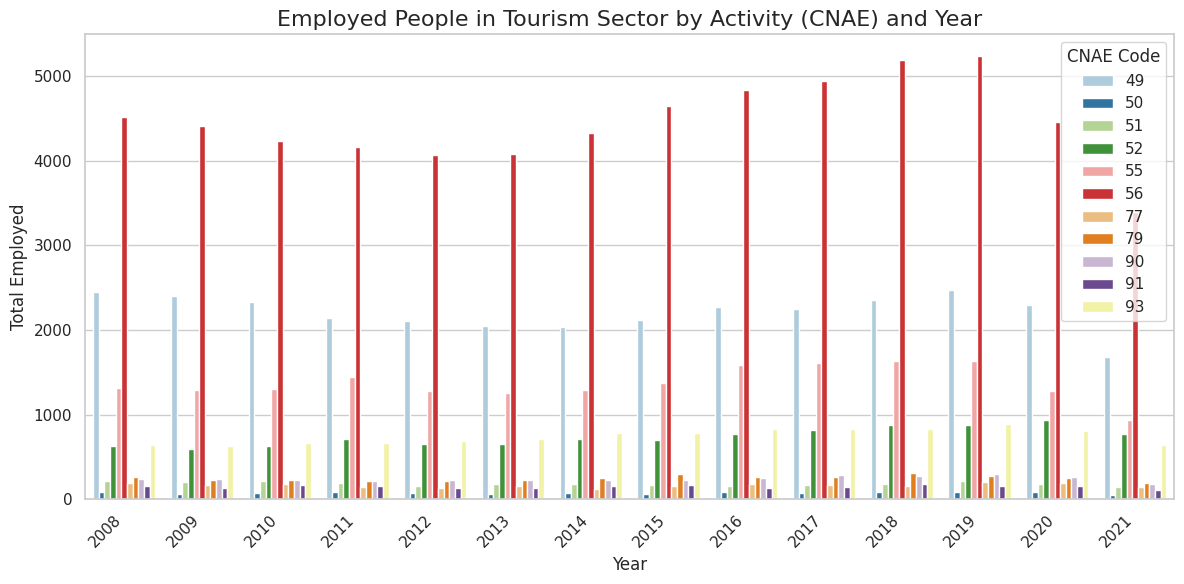

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the datasets to only contain both sexes and absolute values
filtered_ocupados_porc_abs_plot = filtered_ocupados_porc_abs[(filtered_ocupados_porc_abs['Unidad'] == 'Valor absoluto') & (filtered_ocupados_porc_abs['Sexo'] == 'Ambos sexos')]
filtered_ocupados_porc_abs_plot = filtered_ocupados_porc_abs_plot.groupby(['Year', 'CNAE_Code'], as_index=False)['Total'].sum()

# Create the plot splitted by years
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_ocupados_porc_abs_plot,
    x='Year',
    y='Total',
    hue='CNAE_Code',
    errorbar=None,
    palette='Paired')

plt.title('Employed People in Tourism Sector by Activity (CNAE) and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Employed', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='CNAE Code')
plt.tight_layout()
plt.show()

## **2.** Plot a bar graph of employed people in the toursim sector by year, sex and CCAA.

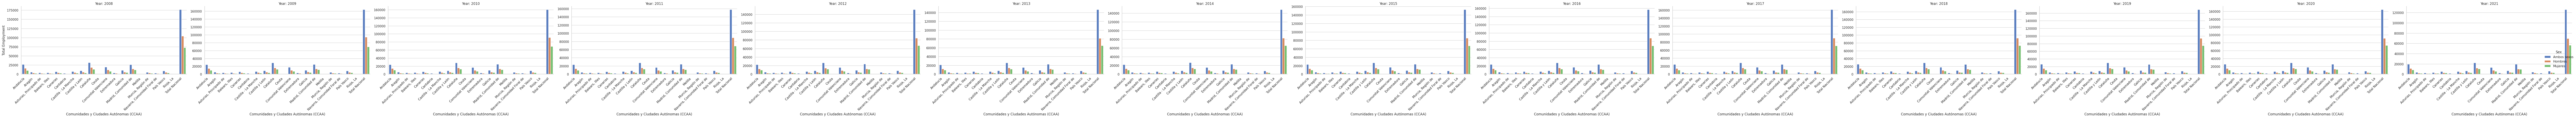

In [123]:
# PREGUNTAR!!!! ARREGLAR LEYENDA

# Filter the datasets to only contain both sexes and absolute values
ocupados_plot = ocupados.groupby(['Year', 'Sexo', 'CCAA'], as_index=False)['Total'].sum()

# Create FacetGrid for bar plots by year
sns.set(style="whitegrid")
g = sns.FacetGrid(
    ocupados_plot,
    col="Year",
    height=6,
    aspect=1.5,
    sharey=False
)

g.map_dataframe(
    sns.barplot,
    x="CCAA",
    y="Total",
    hue="Sexo",
    palette="muted",
    legend=True
)

# Add titles and adjust layout
g.set_axis_labels("Comunidades y Ciudades Autónomas (CCAA)", "Total Employment")
g.set_titles("Year: {col_name}")
g.add_legend(title="Sex")
g.set_xticklabels(rotation=45, horizontalalignment="right")
plt.tight_layout()

plt.show()

## **3.** Plot a boxplot graph containing the distribution of the number of tourists by year per CCAA.

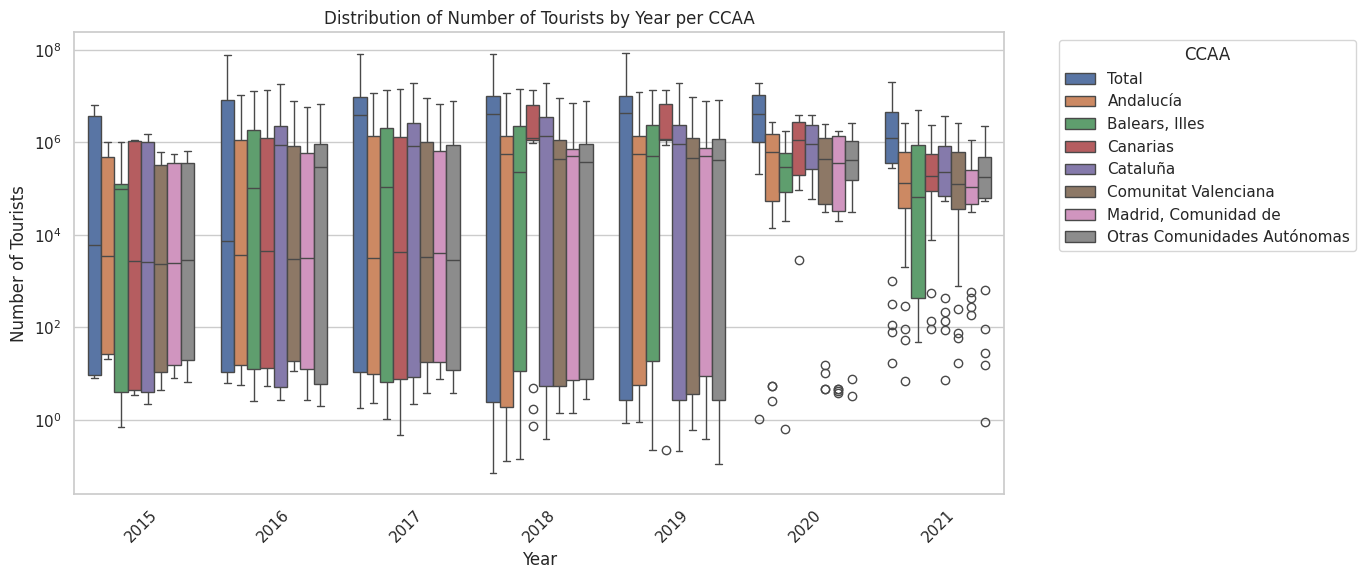

In [124]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data = num_turistas_segun_com_auton,
    x='Year',
    y='Total',
    hue='CCAA',
    log_scale=True
)
plt.title("Distribution of Number of Tourists by Year per CCAA")
plt.xlabel("Year")
plt.ylabel("Number of Tourists")
plt.legend(title="CCAA", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Milestone 4

1. Plot a line plot representing the variation across time of the number of turists by reason for the trip.
2. Plot the time series of the total and average expenses by CCAA of residency for those trips within the Autonomous Community and outside (*Dentro de la Comunidad Autónoma* and *A otra Comunidad Autónoma*).

*Note that you may need to modify/reshape the dataframe to accommodate the data for the visualization part*.

## **1.** Plot a line plot representing the variation across time of the number of turists by reason for the trip.

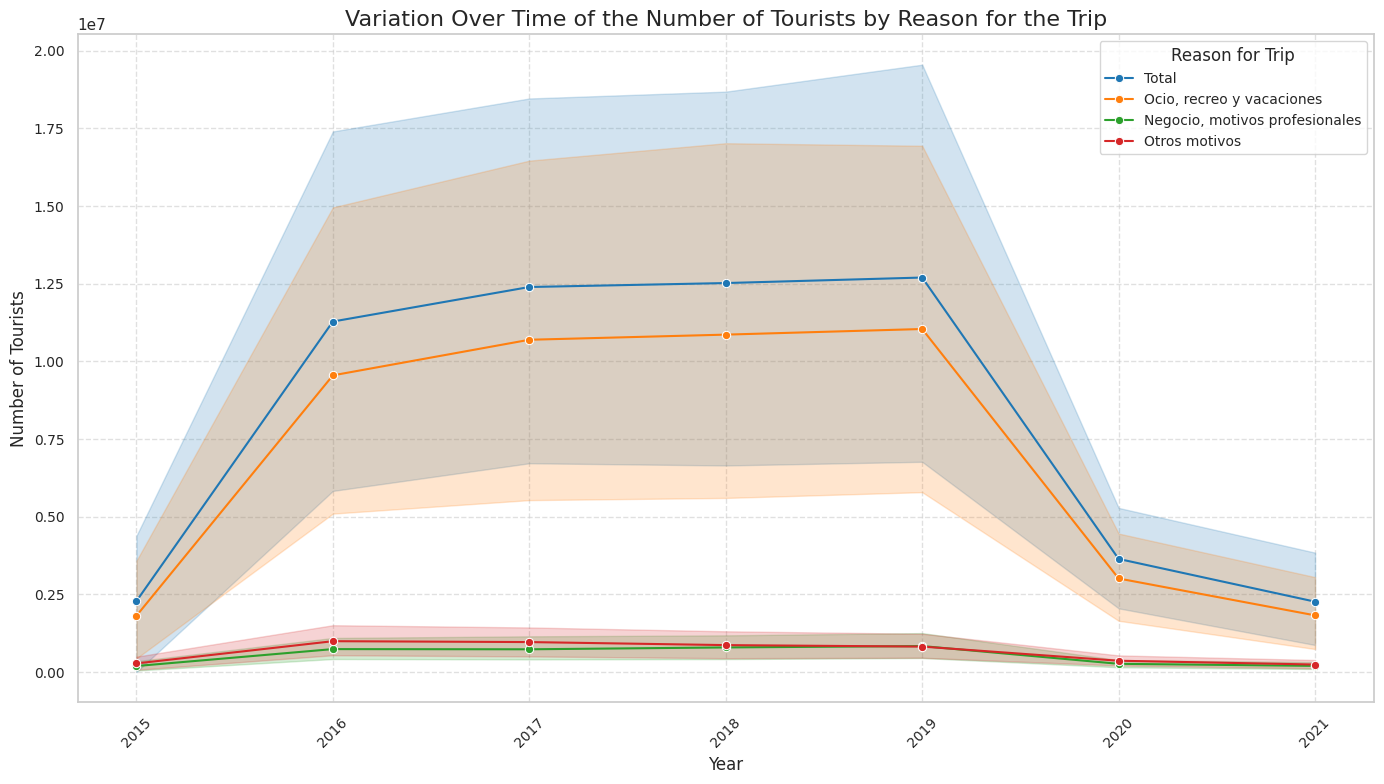

In [125]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=num_turistas_segun_motivo,
    x='Year',
    y='Total',
    hue='Motivo del viaje',
    marker='o',
    palette='tab10'
)
plt.title('Variation Over Time of the Number of Tourists by Reason for the Trip', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Tourists', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Reason for Trip', fontsize=10, title_fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## **2.** Plot the time series of the total and average expenses by CCAA of residency for those trips within the Autonomous Community and outside (Dentro de la Comunidad Autónoma and A otra Comunidad Autónoma).

<ipython-input-126-07ee1e44afbd>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  expenses_grouped['Date'] = pd.to_datetime(


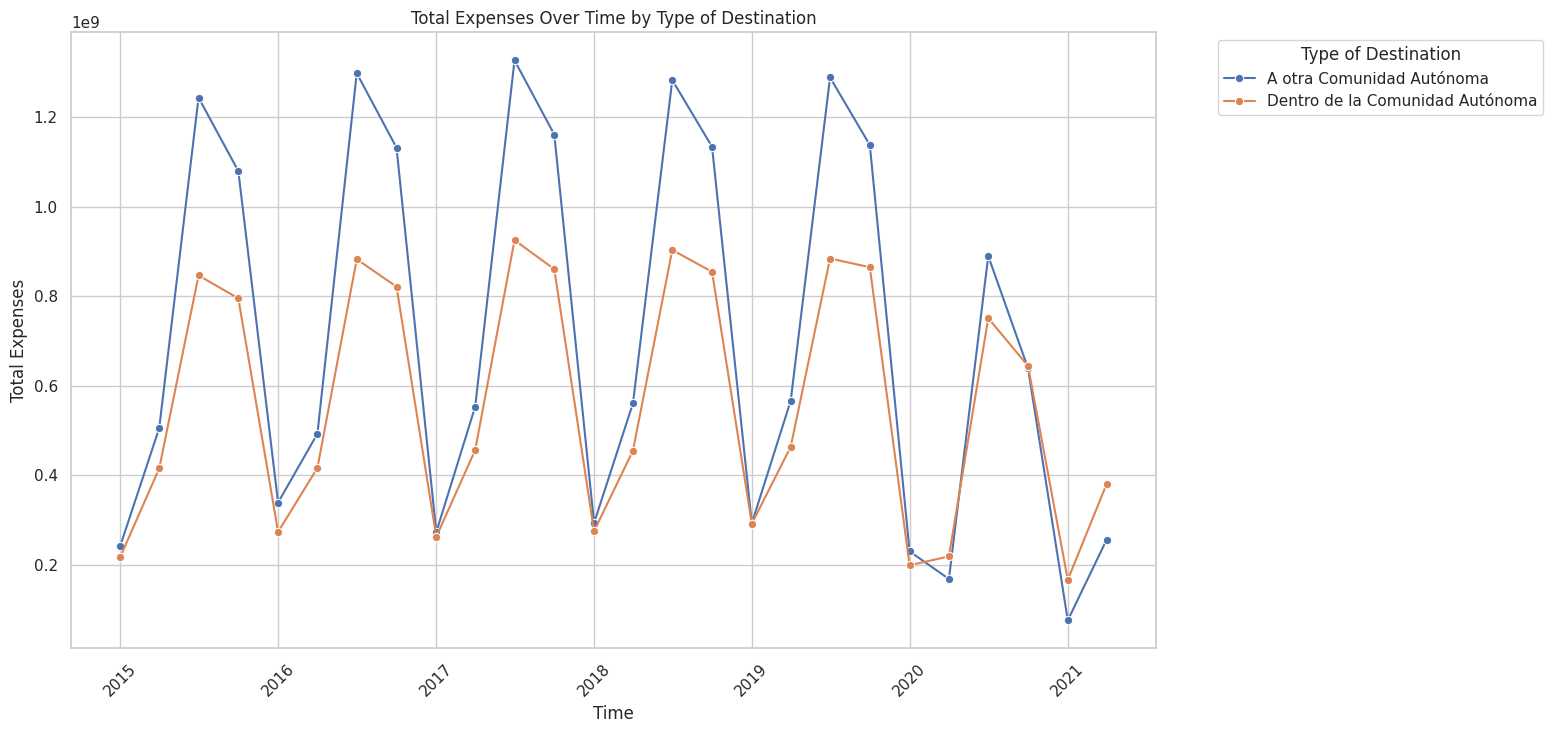

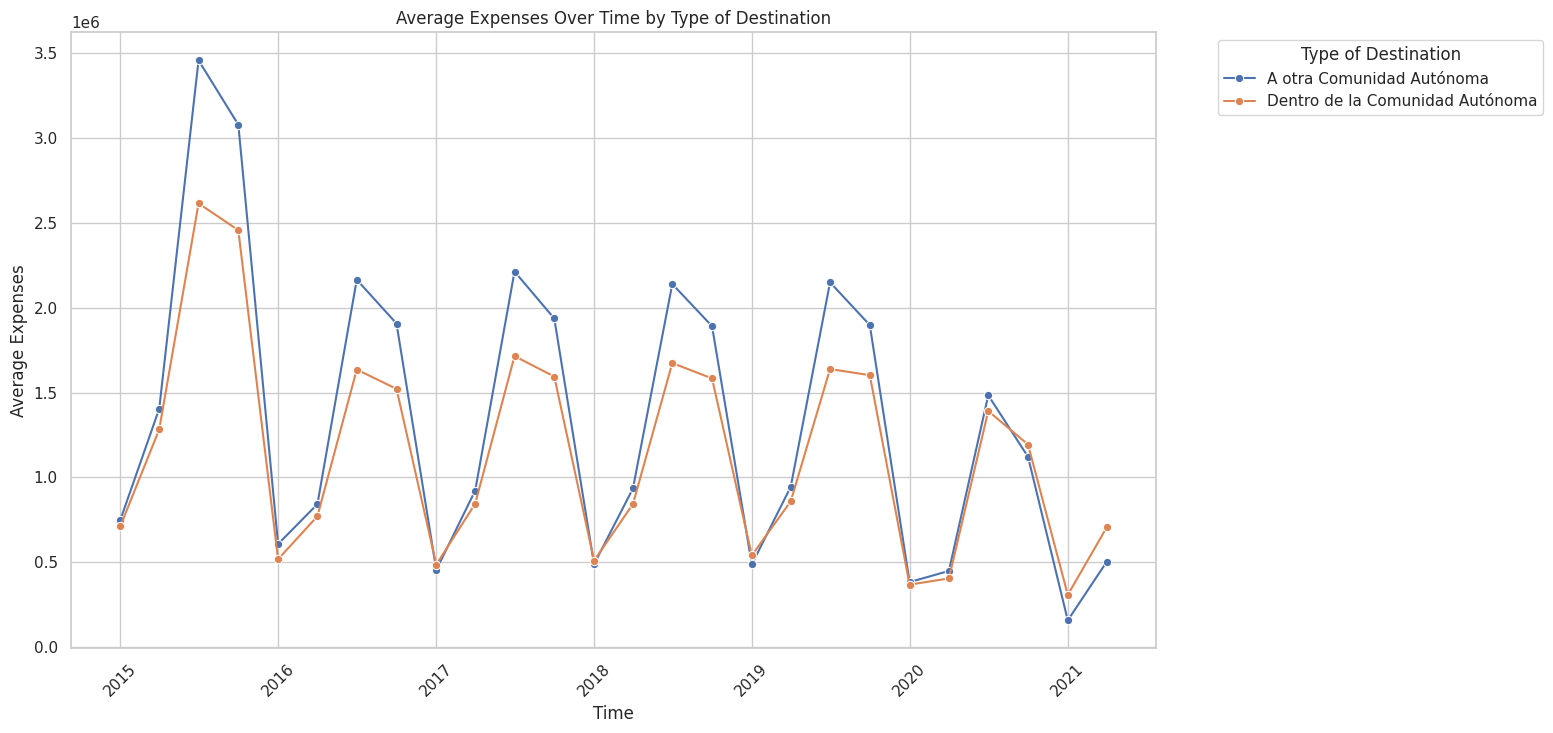

In [126]:
# TODO corregir este, ver como potearolo de otra manera

import matplotlib.pyplot as plt
import seaborn as sns

# Filter for trips within and outside the Autonomous Community
filtered_trips = viajes_internos[
    viajes_internos['Tipo de destino'].isin(['Dentro de la Comunidad Autónoma', 'A otra Comunidad Autónoma'])
]

# Group data to calculate total and average expenses
expenses_grouped = (
    filtered_trips.groupby(['Year', 'Quarter', 'Tipo de destino'])['Total']
    .agg(['sum', 'mean'])
    .reset_index()
    .rename(columns={'sum': 'Total Expenses', 'mean': 'Average Expenses'})
)

# Combine Year and Month into a datetime format for time-series plotting
expenses_grouped['Date'] = pd.to_datetime(
    expenses_grouped['Year'].astype(str) + '-' + 'Q' + expenses_grouped['Quarter'].astype(str)
)

# Plot total expenses over time
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=expenses_grouped,
    x='Date',
    y='Total Expenses',
    hue='Tipo de destino',
    marker='o'
)
plt.title("Total Expenses Over Time by Type of Destination")
plt.xlabel("Time")
plt.ylabel("Total Expenses")
plt.legend(title="Type of Destination", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot average expenses over time
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=expenses_grouped,
    x='Date',
    y='Average Expenses',
    hue='Tipo de destino',
    marker='o'
)
plt.title("Average Expenses Over Time by Type of Destination")
plt.xlabel("Time")
plt.ylabel("Average Expenses")
plt.legend(title="Type of Destination", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Milestone 5

1. Create an interactive map with information about the number of trips, the average duration of the trips, and expenses by CCAA of residency in the year 2021. It must be a choropleth map based on the number of trips.

For this milestone, you need to create a map using the [Folium](https://python-visualization.github.io/folium/) library. You also need to download the boundaries (GeoJson) of the Spanish CCAAs. There are many resources where you can find this information, one of them is [opendatasoft](https://public.opendatasoft.com/explore/?sort=modified).

*Note that you may need to modify/reshape the dataframe to accommodate the data for the visualization part*.

In [156]:
num_turistas_segun_com_auton['CCAA_code'] = num_turistas_segun_com_auton['Comunidades autónomas'].str.extract(r'^([0-9]+)')
num_turistas_segun_com_auton_map = num_turistas_segun_com_auton[(num_turistas_segun_com_auton['Year'] == 2021) & (num_turistas_segun_com_auton['CCAA'] != 'Total')] # filter by year (2021)
num_turistas_segun_com_auton_map.head()

,Comunidades autónomas,Tipo de dato,Periodo,Total,Year,Month,CCAA,CCAA_code
288,01 Andalucía,Dato base,2021M09,687383.0,2021,M09,Andalucía,01
289,01 Andalucía,Dato base,2021M08,698992.0,2021,M08,Andalucía,01
290,01 Andalucía,Dato base,2021M07,554924.0,2021,M07,Andalucía,01
291,01 Andalucía,Dato base,2021M06,296044.0,2021,M06,Andalucía,01
292,01 Andalucía,Dato base,2021M05,166330.0,2021,M05,Andalucía,01


In [157]:
viajes_internos['CCAA_code'] = viajes_internos['Comunidad autónoma de residencia'].str.extract(r'^([0-9]+)')
viajes_internos_map = viajes_internos[(viajes_internos['Year'] == 2021) & (viajes_internos['CCAA'] != 'Total')] # filter by year (2021)
viajes_internos_map.head()

,Comunidad autónoma de residencia,Tipo de destino,Concepto turístico,Tipo de dato,Periodo,Total,Year,Quarter,CCAA,CCAA_code
2808,01 Andalucía,España,Viajes,Valor absoluto,2021T2,5273659.0,2021,2,Andalucía,01
2809,01 Andalucía,España,Viajes,Valor absoluto,2021T1,2215646.0,2021,1,Andalucía,01
2834,01 Andalucía,España,Viajes,Distribución porcentual,2021T2,100.0,2021,2,Andalucía,01
2835,01 Andalucía,España,Viajes,Distribución porcentual,2021T1,100.0,2021,1,Andalucía,01
2860,01 Andalucía,España,Viajes,Acumulado en lo que va de año,2021T2,7489305.0,2021,2,Andalucía,01


In [158]:
# Calculate number of trips == number of tourists
trips_aggregated = num_turistas_segun_com_auton_map.groupby(['CCAA_code', 'CCAA']).agg(total_trips=('Total', 'sum')).reset_index()
trips_aggregated

,CCAA_code,CCAA,total_trips
0,01,Andalucía,9919294.91
1,04,"Balears, Illes",18774973.96
2,05,Canarias,9774345.66
3,09,Cataluña,14434651.54
4,10,Comunitat Valenciana,9808957.63
5,13,"Madrid, Comunidad de",5054060.63


In [162]:
# Calculate expenses per CCAA
expenses_ccaa = viajes_internos_map.groupby(['CCAA_code', 'CCAA']).agg(average_expenses=('Total', 'mean')).reset_index()
expenses_ccaa

,CCAA_code,CCAA,average_expenses
0,01,Andalucía,786165.282701
1,02,Aragón,153698.462586
2,03,"Asturias, Principado de",126697.744483
3,04,"Balears, Illes",146780.505517
4,05,Canarias,275265.644306
5,06,Cantabria,59826.260230
6,07,Castilla y León,314672.545690
7,08,Castilla - La Mancha,243733.101056
8,09,Cataluña,866768.519483
9,10,Comunitat Valenciana,578191.708966


In [1]:
import pandas as pd
import folium
import json
from IPython.display import display

geojson_path = '/content/drive/MyDrive/WEB_ANALYTICS/Lab4_DataVisualization/georef-spain-comunidad-autonoma.geojson'

# Load GeoJSON data
with open(geojson_path, 'r', encoding='utf-8') as file:
    geojson_data = json.load(file)

# Add trip data to GeoJSON properties
# Map the values directly from trips_aggregated to the GeoJSON features
for feature in geojson_data["features"]:
    region_code = feature["properties"]["acom_code"]  # Region code from GeoJSON
    region_num_trips = trips_aggregated[trips_aggregated["CCAA_code"] == region_code]  # Match with CSV data
    region_total_expenses = expenses_ccaa[expenses_ccaa["CCAA_code"] == region_code]  # Match with CSV data

    # Assign total trips
    if not region_num_trips.empty:
        total_trips = region_num_trips['total_trips'].values[0]  # Extract scalar value
        feature["properties"]["total_trips"] = total_trips
        feature["properties"]["acom_name"] = region_num_trips['CCAA'].values[0]  # Extract scalar value
    else:
        feature["properties"]["total_trips"] = 0  # Set 0 if no match

    # Assign average expenses
    if not region_total_expenses.empty:
        total_expenses = region_total_expenses['average_expenses'].values[0]  # Extract scalar value
        feature["properties"]["average_expenses"] = total_expenses
        feature["properties"]["acom_name"] = region_total_expenses['CCAA'].values[0]  # Extract scalar value
    else:
        feature["properties"]["average_expenses"] = 0  # Set 0 if no match



# Create a Folium map centered on Spain
m = folium.Map(location=[40.4168, -3.7038], zoom_start=6, tiles="cartodbpositron")

# Add a choropleth layer
choropleth = folium.Choropleth(
    geo_data=geojson_data,
    name="choropleth",
    data=expenses_ccaa,
    columns=["CCAA_code", "average_expenses"],
    key_on="feature.properties.acom_code",  # Use region code for matching
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.0,
    legend_name="Number of Trips (2021)"
).add_to(m)

# Add tooltips using GeoJsonTooltip
folium.features.GeoJsonTooltip(
    fields=["acom_name", "total_trips", "average_expenses"],
    aliases=["CCAA: ", "Total Trips: ", "Average Expenses: "],
    style=("background-color: white; color: black; font-family: Arial; font-size: 12px; padding: 5px;")
).add_to(choropleth.geojson)

# Save the map as an HTML file
map_output_path = 'spain_trips_2021_map7.html'
m.save(map_output_path)
print(f"Map saved to {map_output_path}")

# Display the map inline in Jupyter Notebook
display(m)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/WEB_ANALYTICS/Lab4_DataVisualization/georef-spain-comunidad-autonoma.geojson'

# Milestone 6

** **This milestone does not count for grade.** **

Save and store the datasets processed for use them in  Lab2: Google Data Studio.


# Lab2: Google Data Studio


## 0. Lab Preparation

1.  Study and have clear the concepts explained in the theoretical class and the introductory lab.

2.   Gain experience with the use of [Google Data Studio](https://datastudio.google.com/). The goals of this lab will be mainly based on the utilization of this tool to create a dashboard.


## 1. Lab Introduction

* In this lab, we will use the dataset of the previous lab for visualization using [Google Data Studio](https://datastudio.google.com/).

* The lab will be done in groups of 2 people.

* The lab defines a set of guidelines the students must acomplish.

* **The grade will depend directly on the final result of your dashboard. Make it as visual as possible!**

* **Each group should also share their dashboard with the professor upon the finalization of the lab.**


## 2. Lab guidelines

For this practice, you have to use **Google Data Studio**. The style to use is free. The clearer and more visual your dashboard is, the better will be the grade.

Your dashboard must have at least the following elements:

1. A highlight box with total results.
2. A chart with a time series.
3. A pie chart.
4. A bar chart.
5. A table summarizing results.
6. A map that represents the data by CCAAs.

As you can see, the instructions are open-ended. You just have to represent the data in a meaningful way.
You will see that the processing we have done in the first lab is helpful for this part. In case you need to do some extra processing or modification of the data, you must do it in Python in this notebook, and it must be reflected and explained here.


---



To upload your dashboard to AG, click on Share -> Download as PDF -> Add a link back to the report. That will generate a PDF that you have to upload to AG.

Apart from that, for those taking the course remotely, I need you to invite me to your Data Studio project. (Share -> Invite people -> Add people), and to send a word document explaining how you build the dashboard.